<a href="https://colab.research.google.com/github/KartikayBhardwaj-dev/Ai_lab/blob/main/ai_lab_Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Toics**

- Tensors, Pytorch popular functions
- ANN, piprline, dataloader
- CNN, image Data
- RNN, Text Data  
- LSTM, GRU, Encoder-decoder, Transformer

## Modules

- torch - core module providing arrays(tensors) and math operation
- torch.autograd - automatic differentiation that records operation on tensors to compute gradient for optimization
- torch.nn - provides a neural network library, including layers, activations, loss functions
- torch.optim - contains optimization algo like SGD, Adam, RMSprop
- torch.utils.data - Utilities for handling data, including dataset and dataloader classes
- torch.distributed - tools for distributed training facillating parallel computaion
- torch.cuda - to enable gpu acceleration for tensor computation and model training
- torch.multiprocessing - utilities for parallesim using multiprocessing
- torch.quantization - tools for model quantization to reduce model size
- torch.onnx - supports exporting PyTorch models to ONNx (open Neural network exchange) format

**Torchvision** - used for compurter vision tasks

**TorchText** - used for text data
**TorchAudio** - used for audio data

## Creating tensor

In [2]:
import torch

In [3]:
first_var = torch.tensor(2, dtype=torch.float32) #scalar tensor
print(first_var)
print(first_var.ndim)  #gives dimension
a = torch.tensor([2,3,4]) #1d tensor
print(a)
print(a.ndim)
b = torch.tensor([[1, 2], [3, 4]])  #2d tensor/ matrix
print(b.ndim,b.shape)
print(f"data type of {a} is {a.dtype}") #check dtype of tensor
print(f"data type of {first_var} is {first_var.dtype}")


tensor(2.)
0
tensor([2, 3, 4])
1
2 torch.Size([2, 2])
data type of tensor([2, 3, 4]) is torch.int64
data type of 2.0 is torch.float32


torch.float32 --> ann, cnn, rnn use this 32 size as input

Empty Tensor - to store initialisation values which are almost empty

it store garbage value like location, etc its random

In [ ]:
c = torch.empty((2, 2), dtype=torch.int64)
c

tensor([[           0,            0],
        [         171, 433791696997]])

Zeroes

In [ ]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones

In [ ]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Manual seed
- random (rand) -> gives random value acc to dimension, useful for initialisation for weights

In [ ]:
torch.rand(2, 2)

tensor([[0.3003, 0.3000],
        [0.4962, 0.2912]])

In [ ]:
#Arange (start, end, step_size) -> used to arange in ascend
torch.arange(0, 5, 2)

tensor([0, 2, 4])

In [ ]:
#Squeeze removing one dimension from the original one
b = torch.tensor([[[1, 2]]])
print(b)
torch.squeeze(b)


tensor([[[1, 2]]])


tensor([1, 2])

## AutoGrad -> automatic differentiation that records operation on tensors to compute gradient for optimization


In [5]:
!pip install torchviz

In [6]:
import torch
from torchviz import make_dot

In [ ]:
z = torch.tensor(3.0, requires_grad=True)
print(f"initial weight is: {z}")
y = z**2
print(f"after forward propagation, func is y^2: {y}")
y.backward()  #gradients have been computed
print(f"after gradient descent, func is 2y: {z.grad}")

initial weight is: 3.0
after forward propagation, func is y^2: 9.0
after gradient descent, func is 2y: 6.0


Gradient accumulation and clearing the gradients
- there is a problem if we do again and again it changing the values even if z is same

In [ ]:
print(z)
y = z**2
y.backward()
print(z.grad)
#to solve this problem we have to clear the gradient old value
z.grad.zero_()

tensor(3., requires_grad=True)
tensor(6.)


tensor(0.)

**Update the leaf variable values**
1. z was some variable or weights and to gradient it then  or we have some learning rate then what

In [ ]:
z.is_leaf


True

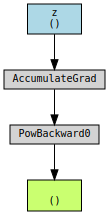

In [ ]:
# plotiing why z is leaf
make_dot(y, params={"z": z})

In [ ]:
learning_rate = 0.2
z -= learning_rate * z.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
y = z**2
y.backward()

In [ ]:

with torch.no_grad():
  z -= 0.2 * z.grad
z

tensor(-1.9920, requires_grad=True)

**A simple training loop**

tensor(7., grad_fn=<AddBackward0>)


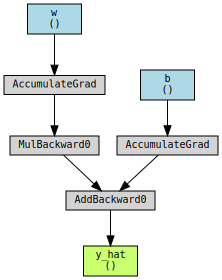

In [ ]:
w = torch.tensor(2.0, requires_grad=True) #weight
x = torch.tensor(3.0, requires_grad=False)  #input
b = torch.tensor(1.0, requires_grad=True) #bias
y_hat = w*x + b #forward
print(y_hat)
make_dot(y_hat, params={"w": w, "b": b, "y_hat": y_hat})


Doing simple training loop for some epochs to see that loss reduces or not

In [15]:
x = torch.tensor(3.0, requires_grad=False)  #input
y = torch.tensor(1.0, requires_grad=False)  #label given
w = torch.tensor(2.0, requires_grad=True) #weight
b = torch.tensor(1.0, requires_grad=True)

for i in range(10):
  #forward pass
  y_hat = w*x + b

  #compute loss
  loss = (y_hat - y)**2 #squared loss

  print(f"Epoch no.{i} -> w = {w.data} , b = {b.data}")
  print("loss = ",loss)
  print()

  #backward pass
  loss.backward()

  #gradients

  learning_rate = 0.01
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
  w.grad.zero_(), b.grad.zero_()

Epoch no.0 -> w = 2.0 , b = 1.0
loss =  tensor(36., grad_fn=<PowBackward0>)

Epoch no.1 -> w = 1.6399999856948853 , b = 0.8799999952316284
loss =  tensor(23.0400, grad_fn=<PowBackward0>)

Epoch no.2 -> w = 1.3519999980926514 , b = 0.7839999794960022
loss =  tensor(14.7456, grad_fn=<PowBackward0>)

Epoch no.3 -> w = 1.1216000318527222 , b = 0.7071999907493591
loss =  tensor(9.4372, grad_fn=<PowBackward0>)

Epoch no.4 -> w = 0.9372800588607788 , b = 0.6457599997520447
loss =  tensor(6.0398, grad_fn=<PowBackward0>)

Epoch no.5 -> w = 0.7898240685462952 , b = 0.5966079831123352
loss =  tensor(3.8655, grad_fn=<PowBackward0>)

Epoch no.6 -> w = 0.6718592643737793 , b = 0.5572863817214966
loss =  tensor(2.4739, grad_fn=<PowBackward0>)

Epoch no.7 -> w = 0.5774874091148376 , b = 0.5258290767669678
loss =  tensor(1.5833, grad_fn=<PowBackward0>)

Epoch no.8 -> w = 0.5019899606704712 , b = 0.5006632804870605
loss =  tensor(1.0133, grad_fn=<PowBackward0>)

Epoch no.9 -> w = 0.4415919780731201 , b 